# CRM / FLO


---

Customer Segmentation with RFM.

DataSet could found from : [Kaggle CRM FLO Data](https://www.kaggle.com/datasets/ramzanzdemir/flo-data-20k)



---

> Business Problem



FLO, an online shoe store, wants to segment its customers and determine marketing strategies according to these segments.



# Data Story


The data set consists of information obtained from the past shopping behaviour of customers who made their last purchases from Flo as OmniChannel (both online and offline shoppers) in 2020-2021.

*master_id* : Customer ID

*order_channel* : Which channel of the shopping platform is used  (Android, ios, Desktop, Mobile)

*last_order_channel* : The channel where the last purchase was made

*first_order_date* : Customer's first purchase date

*last_order_date* : Customer's last purchase date

*last_order_date_online* : Date of the customer's last online shopping

*last_order_date_offline* : Date of the customer's last offline shopping

*order_num_total_ever_online* : Total number of purchases made by the customer on the online platform

*order_num_total_ever_offline* : Total number of purchases made by the customer on the offline platform

*customer_value_total_ever_offline* : Total price paid by the customer for offline shopping

*customer_value_total_ever_online* : Total price paid by the customer for online shopping

*interested_in_categories_12* : List of categories in which the customer has shopped in the last 12 months


# Data Preparation

In [ ]:
import datetime as dt
import pandas as pd
import seaborn as sns

In [ ]:
df_ = pd.read_csv("/content/flo_data_20k.csv")
df = df_.copy()
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

There is no null value.
There is a datetime data type that appears as object.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [ ]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [ ]:
df.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

Generate 2 new variables for online and offline order and purchase totals

In [ ]:
df["total_order_num"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["total_custumer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,quantity,totalprice,total_order_num,total_custumer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5,939,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2014,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5,585,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2,122,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2,210,2.0,209.98


Fixing the type of date variables as datetime

In [ ]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

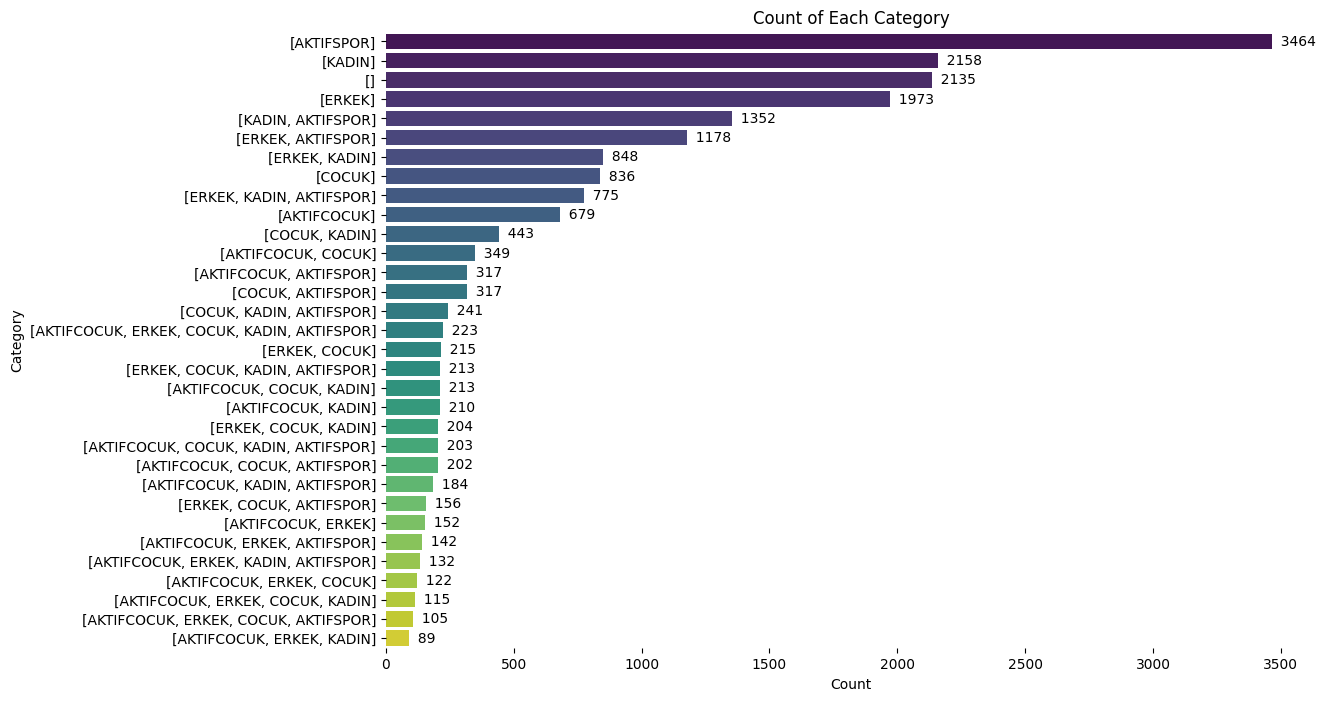

In [ ]:
#Visualization of interested categories
category_counts = df['interested_in_categories_12'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

plt.figure(figsize=(12, 8))
g = sns.barplot(x='count', y='category', data=category_counts, palette="viridis")
sns.despine(bottom=True, left=True)

for i, v in enumerate(category_counts['count']):
    g.text(v, i, "  " + str(v), color='black', ha='left', va='center')

g.set_ylabel('Category')
g.set_xlabel('Count')
plt.title('Count of Each Category')
plt.show()

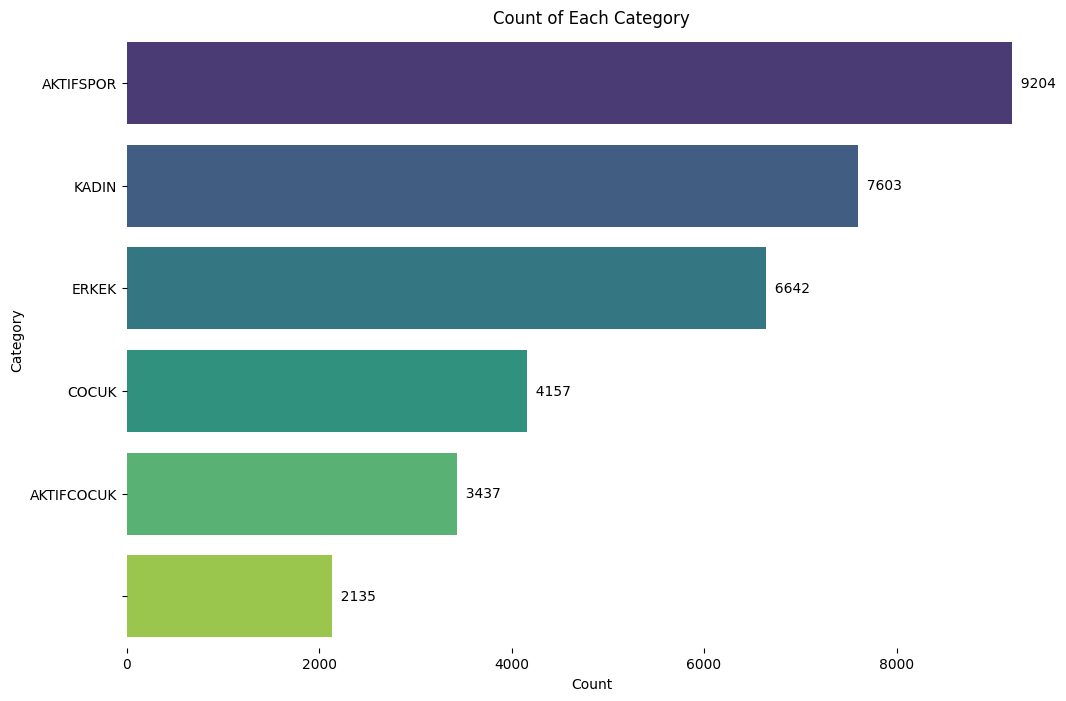

In [ ]:
#Visualization of main interested categories
expanded_categories = df['interested_in_categories_12'].str.strip('[]').str.replace(' ', '').str.split(',')
expanded_df = expanded_categories.explode().reset_index(drop=True)

category_counts = expanded_df.value_counts().reset_index()
category_counts.columns = ['category', 'count']

plt.figure(figsize=(12, 8))
g = sns.barplot(x='count', y='category', data=category_counts, palette="viridis")
sns.despine(bottom=True, left=True)

for i, v in enumerate(category_counts['count']):
    g.text(v, i, "  " + str(v), color='black', ha='left', va='center')

g.set_ylabel('Category')
g.set_xlabel('Count')
plt.title('Count of Each Category')
plt.show()

In [ ]:
order_df = df.groupby("order_channel").agg({"master_id": "count",
                                 "total_order_num": "sum",
                                 "total_custumer_value": "sum"})

order_df = pd.DataFrame(order_df)
print(order_df)

               master_id  total_order_num  total_custumer_value
order_channel                                                  
Android App         9495          51743.0           7710929.060
Desktop             2735          10853.5           1595768.438
Ios App             2833          15152.0           2463718.532
Mobile              4882          21547.5           3021326.437


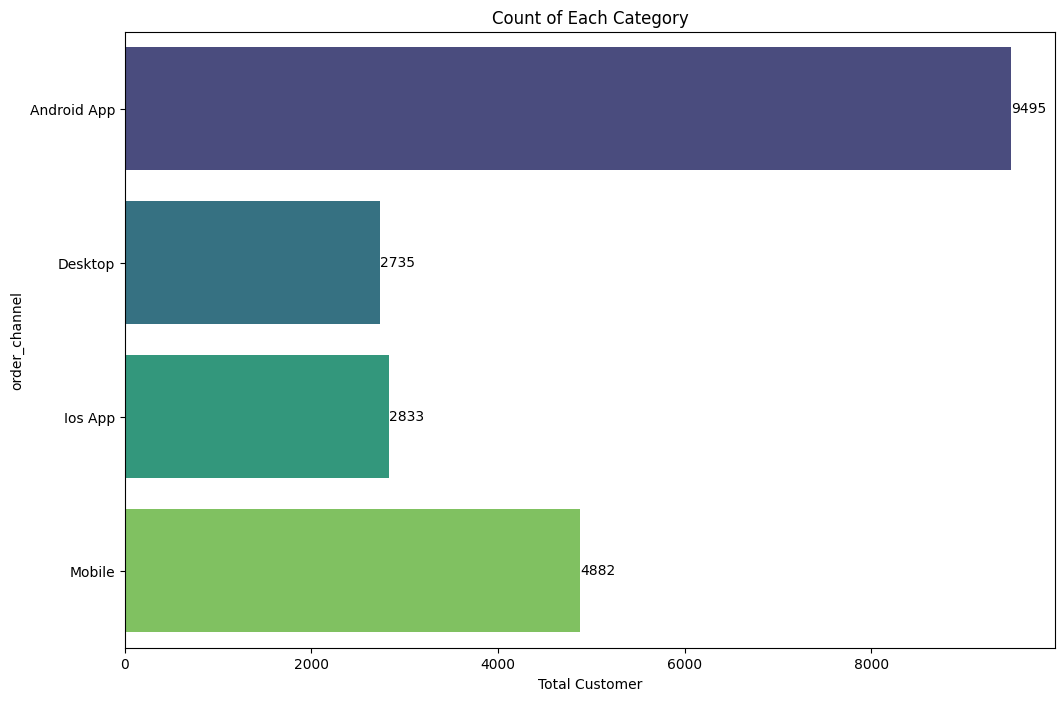

In [ ]:
import matplotlib

#order_df = order_df.reset_index()

plt.figure(figsize=(12, 8))

g = sns.barplot(x='master_id', y='order_channel', data=order_df, palette="viridis")

for i, v in enumerate(order_df['master_id']):
    g.text(v, i, "" + str(v), color='black', ha='left', va='center')

g.set_xlabel('Total Customer')
plt.title('Count of Each Category')
plt.show()

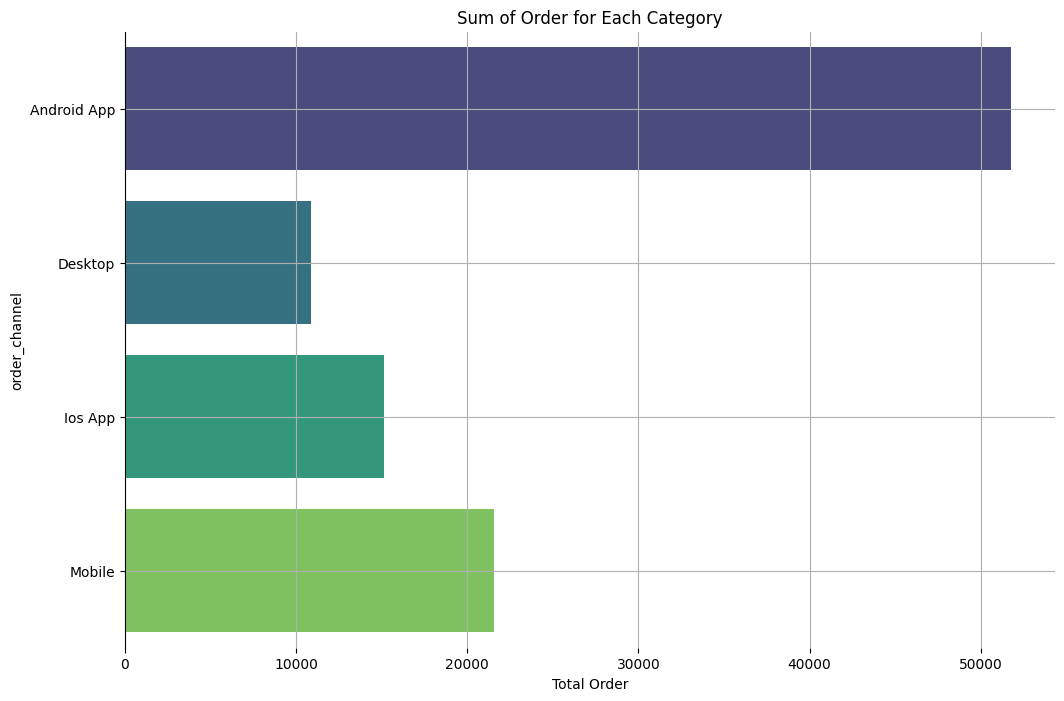

In [ ]:
plt.figure(figsize=(12, 8))

g = sns.barplot(x='total_order_num', y='order_channel', data=order_df, palette="viridis")
sns.despine(right = True, bottom=True)

for i, v in enumerate(order_df['total_order_num']):
    g.text(v, i, s="")

g.set_xlabel('Total Order')
plt.title('Sum of Order for Each Category')
plt.grid(True)
plt.show()

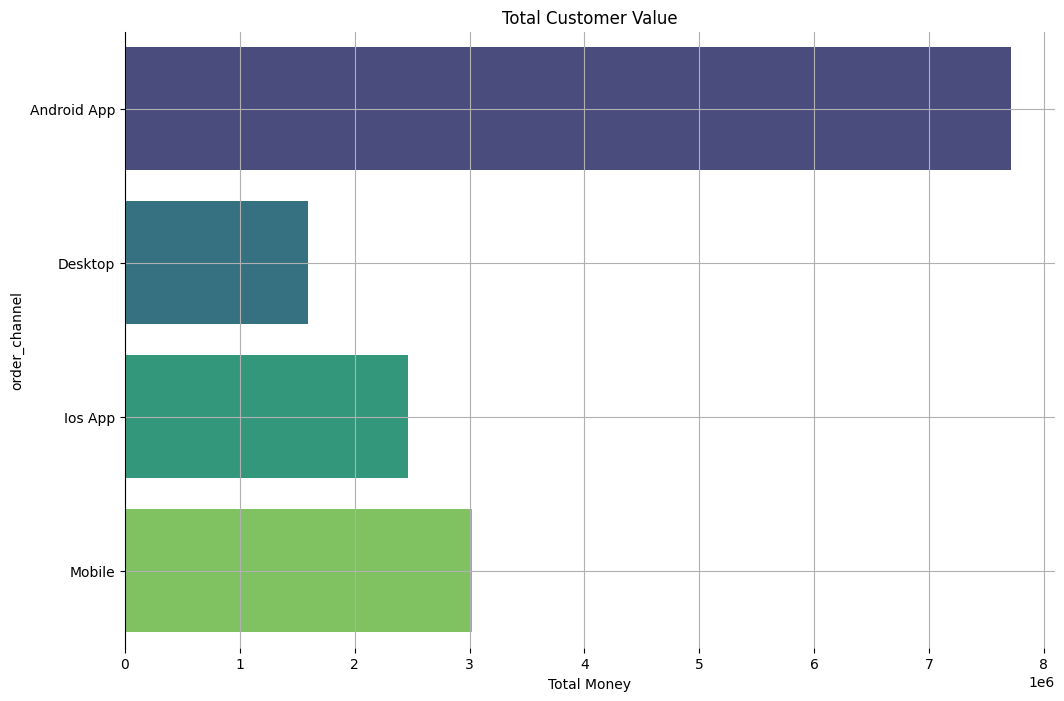

In [ ]:
plt.figure(figsize=(12, 8))

g = sns.barplot(x='total_custumer_value', y='order_channel', data=order_df, palette="viridis")
sns.despine(right = True, bottom=True)

for i, v in enumerate(order_df['total_custumer_value']):
    g.text(v, i, s="")

g.set_xlabel('Total Money')
plt.title('Total Customer Value')
plt.grid(True)
plt.show()

As a result of the examination of the total number of orders and expenditures by order channel, the lowest number of orders and expenditures were made on Desktop, while the highest number of orders and expenditures were made on Android App.

In [ ]:
master = df.groupby("order_channel").agg({"master_id": "count"}).rename(columns={"master_id": "customer_count"})

order = df.groupby("order_channel").agg({"total_order_num": "sum"})

value = df.groupby("order_channel").agg({"total_custumer_value": "sum"})

orderchannel = pd.merge(order, value, on="order_channel")
orderchannel = pd.merge(orderchannel, master, on="order_channel")

orderchannel["custumerorder"] = orderchannel["total_order_num"] / orderchannel["customer_count"]
orderchannel["custumervalue"] = orderchannel["total_custumer_value"] / orderchannel["customer_count"]
print(orderchannel)

               total_order_num  total_custumer_value  customer_count  \
order_channel                                                          
Android App            52269.0            7819062.76            9495   
Desktop                10920.0            1610321.46            2735   
Ios App                15351.0            2525999.93            2833   
Mobile                 21679.0            3028183.16            4882   

               custumerorder  custumervalue  
order_channel                                
Android App         5.504897     823.492655  
Desktop             3.992687     588.782984  
Ios App             5.418637     891.634285  
Mobile              4.440598     620.275125  


When the total order and expenditure of each customer is examined to examine the effect of the order cahnnel on a customer basis, we see that an iOS App user spends more, although the most product purchases are in android app users. So increasing the number of our customers using Ios App can provide us with profit.

In [ ]:
df.sort_values(by = "total_custumer_value", ascending = False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_custumer_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0,1.0,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.0,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0,1.0,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.0,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0,3.0,18119.14,2587.20,[AKTIFSPOR],4.0,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0,1.0,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.0,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0,2.0,64.97,12038.18,"[ERKEK, KADIN]",20.0,12103.15


In [ ]:
df.sort_values(by = "total_order_num", ascending = False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_custumer_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0,109.0,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.0,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0,87.0,8432.25,139.98,[ERKEK],88.0,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0,81.0,3997.55,242.81,[ERKEK],83.0,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0,74.0,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.0,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0,3.0,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.0,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57


# RFM Metrics

In [ ]:
print(df["last_order_date"].max())

today_date = dt.datetime(2021, 6, 1)


2021-05-30 00:00:00


In [ ]:
rfm = pd.DataFrame()
rfm["master_id"] = df["master_id"]
rfm["recency"] = (today_date - df["last_order_date"]).dt.days
rfm["frequency"] = df["total_order_num"]
rfm["monetary"] = df["total_custumer_value"]

rfm.head()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98


In [ ]:
rfm.describe().T

,count,mean,min,25%,50%,75%,max,std
recency,19945.0,134.45836,2.0,43.0,111.0,202.0,367.0,103.281149
frequency,19945.0,5.024768,2.0,3.0,4.0,6.0,202.0,4.742707
monetary,19945.0,751.244287,44.98,339.98,545.27,897.78,45905.1,895.402173
first_order_date,19945,2019-03-22 16:43:55.246929152,2013-01-14 00:00:00,2019-02-16 00:00:00,2019-08-20 00:00:00,2020-01-01 00:00:00,2021-05-27 00:00:00,NaN
last_order_date,19945,2021-01-17 12:59:57.653547264,2020-05-30 00:00:00,2020-11-11 00:00:00,2021-02-10 00:00:00,2021-04-19 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_online,19945,2020-08-10 01:08:52.644773376,2014-02-24 00:00:00,2020-06-18 00:00:00,2020-12-14 00:00:00,2021-04-05 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_offline,19945,2020-05-17 12:07:24.021058048,2019-01-22 00:00:00,2019-11-04 00:00:00,2020-06-22 00:00:00,2020-12-25 00:00:00,2021-05-28 00:00:00,NaN
order_num_total_ever_online,19945.0,3.110855,1.0,1.0,2.0,4.0,200.0,4.225647
order_num_total_ever_offline,19945.0,1.913913,1.0,1.0,1.0,2.0,109.0,2.06288
customer_value_total_ever_offline,19945.0,253.922597,10.0,99.99,179.98,319.97,18119.14,301.532853


# Calculating RFM Scores

In [ ]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31


Analysing the number of customers between the calculated scores

In [ ]:
crosstab_fr = pd.crosstab(rfm['frequency_score'], rfm['recency_score'])
print(crosstab_fr)

recency_score       5    4    3    2    1
frequency_score                          
1                 680  647  819  891  952
2                 710  708  810  818  943
3                 789  731  823  811  835
4                 864  844  796  790  695
5                1068  962  759  641  559


In [ ]:
crosstab_rm = pd.crosstab(rfm['recency_score'], rfm['monetary_score'])
print(crosstab_rm)

monetary_score     1    2    3    4     5
recency_score                            
5                616  699  809  864  1123
4                627  701  768  818   978
3                861  843  764  810   729
2                829  867  812  792   651
1               1056  879  838  703   508


In [ ]:
crosstab_fm = pd.crosstab(rfm['frequency_score'], rfm['monetary_score'])
print(crosstab_fm)

monetary_score      1     2     3     4     5
frequency_score                              
1                2246  1076   490   152    25
2                1201  1318   920   461    89
3                 473  1131  1269   881   235
4                  66   425  1130  1561   807
5                   3    39   182   932  2833


Segmentation with Regex

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep       113.785144  1629   2.401473  1629   359.008963  1629
at_Risk              241.606835  3131   4.472373  3131   646.610236  3131
cant_loose           235.444167  1200  10.698333  1200  1474.468217  1200
champions             17.106625  1932   8.934265  1932  1406.625109  1932
hibernating          247.949501  3604   2.394007  3604   366.267062  3604
loyal_customers       82.594763  3361   8.374591  3361  1216.818616  3361
need_attention       113.828676   823   3.727825   823   562.142965   823
new_customers         17.917647   680   2.000000   680   339.955544   680
potential_loyalists   37.155888  2938   3.304289  2938   533.184466  2938
promising             58.921175   647   2.000000   647   335.672705   647

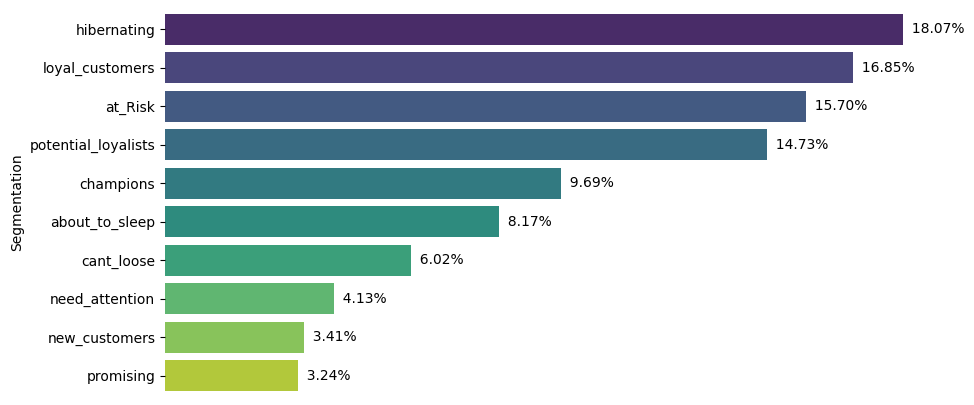

In [ ]:
plt.figure(figsize=(10, 5))

percentage = (rfm['segment'].value_counts(normalize=True) * 100).reset_index()
percentage.columns = ['segment', 'Percentage']

g = sns.barplot(x='Percentage', y='segment', data=percentage, palette="viridis")
sns.despine(bottom=True, left=True)

for i, v in enumerate(percentage['Percentage']):
    g.text(v, i, "  {:.2f}%".format(v), color='black', ha="left", va='center')

g.set_ylabel('Segmentation')
g.set_xlabel('')
g.set(xticks=[])
plt.show()

In [ ]:
rfm.columns

Index(['master_id', 'recency', 'frequency', 'monetary', 'recency_score',
       'frequency_score', 'monetary_score', 'RF_SCORE', 'segment'],
      dtype='object')

In [ ]:
rfm = pd.merge(rfm, df, on="master_id", how="left")
rfm.head()


,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,order_channel,...,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_custumer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34,loyal_customers,Android App,...,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35,loyal_customers,Android App,...,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24,at_Risk,Android App,...,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31,about_to_sleep,Android App,...,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31,about_to_sleep,Desktop,...,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


Customers whose segment is champions and loyal_custumer and who have shopped from KADIN group in the last 12 months

In [ ]:
female_loyal_custumer = pd.DataFrame()

female_loyal_customer = rfm[
    (rfm["interested_in_categories_12"].str.contains("KADIN")) &
    (rfm["segment"].isin(["champions","loyal_custumer"])) #(rfm["segment"] == "champions") | (rfm["segment"] == "loyal_custumer"))
]


female_loyal_customer = female_loyal_customer[["master_id"]]

print(female_loyal_customer.nunique())



master_id    902
dtype: int64


In [ ]:
female_loyal_customer.to_csv("female_loyal_customer.csv")

Customers whose segment is about_to_sleep, at_Risk and new_customers and who have shopped from ERKEK and AKTIFCOCUK categories in the last 12 months.

In [ ]:
male_child_customer = pd.DataFrame()

male_child_customer = rfm[
    (rfm["interested_in_categories_12"].str.contains("ERKEK")) &
    (rfm["interested_in_categories_12"].str.contains("AKTIFCOCUK")) &
    ((rfm["segment"] == "about_to_sleep") | (rfm["segment"] == "at_Risk") | (rfm["segment"] == "new_customers"))
]

male_child_customer = male_child_customer[["master_id"]]

print(male_child_customer.nunique())

master_id    176
dtype: int64


In [ ]:
male_child_customer.to_csv("male_child_customer.csv")

# CLTV PREDICTION

Customer Lifetime Value Prediction with BG-NBD and Gamma-Gamma



---



> Business Problem

FLO wants to determine a roadmap for sales and marketing activities. In order for the company to make a medium and long term plan, it is necessary to estimate the potential value that existing customers will provide to the company in the future.




# Data Preparation

In [ ]:
!pip install lifetimes
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



In [ ]:
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [ ]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [ ]:
num_cols = [col for col in df if df[col].dtype in [float, int]]
print(num_cols)

for col in num_cols:
  replace_with_thresholds(df, col)



['order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online']


In [ ]:
df["quantity"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["totalprice"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,quantity,totalprice
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [ ]:
df['quantity'] = df['quantity'].round().astype(int)
df['totalprice'] = df['totalprice'].round().astype(int)
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,quantity,totalprice
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5,939
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2014
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5,585
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2,122
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2,210


In [ ]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [ ]:
print(df["last_order_date"].max())
print(df["last_order_date_online"].max())
print(df["last_order_date_offline"].max())

2021-05-30 00:00:00
2021-05-30 00:00:00
2021-05-28 00:00:00


In [ ]:
analyze_date = df["last_order_date"].max() + pd.DateOffset(days=2)
print(analyze_date)

2021-06-01 00:00:00


# CLTV Data Preparation

In [ ]:
cltv = pd.DataFrame()

cltv["master_id"] = df["master_id"]
cltv["recency_cltv_weekly"] = (df["last_order_date"] - df["first_order_date"]).dt.days / 7
cltv["T_weekly"] = (today_date - df["first_order_date"]).dt.days / 7
cltv["frequency"] = df["quantity"]
cltv["monetary_cltv_avg"] = df["totalprice"] / df["quantity"]
cltv.head()

,master_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5,187.800000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21,95.904762
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5,117.000000
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2,61.000000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2,105.000000


# BG/NBD Modelling

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv['frequency'],
        cltv['recency_cltv_weekly'],
        cltv['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 76.15, b: 0.00, r: 3.66>

In [ ]:
#Expected sales from customers within 3 months
cltv["exp_sales_3_month"] = bgf.predict(4*3,
                                       cltv['frequency'],
                                       cltv['recency_cltv_weekly'],
                                       cltv['T_weekly'])

In [ ]:
#Expected sales from customers within 6 months
cltv["exp_sales_6_month"] = bgf.predict(4*6,
                                       cltv['frequency'],
                                       cltv['recency_cltv_weekly'],
                                       cltv['T_weekly'])

# Gamma-Gamma Modelling

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv['frequency'], cltv['monetary_cltv_avg'])
cltv["exp_average_value"] = ggf.conditional_expected_average_profit(cltv['frequency'],
                                                                cltv['monetary_cltv_avg'])
cltv.head()

,master_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5,187.800000,0.974042,1.948084,193.556636
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21,95.904762,0.983203,1.966406,96.686595
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5,117.000000,0.670617,1.341235,120.901876
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2,61.000000,0.700469,1.400939,67.336067
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2,105.000000,0.396028,0.792055,114.335626


In [ ]:
ggm = ggf.customer_lifetime_value(bgf,
                                   cltv['frequency'],
                                   cltv['recency_cltv_weekly'],
                                   cltv['T_weekly'],
                                   cltv['monetary_cltv_avg'],
                                   time=6,
                                   freq="W",
                                   discount_rate=0.01)
cltv["cltv"] = ggm



In [ ]:
cltv.sort_values("cltv", ascending=False)[:20]

,master_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.857143,7.857143,4,1401.750000,1.094566,2.189133,1449.007871,3328.208725
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.142857,13.142857,11,758.000000,1.970520,3.941039,767.273964,3172.699338
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.714286,101.000000,7,1106.428571,0.722273,1.444545,1127.571821,1709.003655
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.285714,74.571429,16,501.875000,1.565487,3.130974,506.167844,1662.806451
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,67.285714,52,166.211538,4.656855,9.313709,166.699135,1629.009816
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,3.428571,34.428571,8,601.250000,1.265632,2.531264,611.516552,1624.102145
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,8.285714,9.428571,2,862.500000,0.794016,1.588032,923.475758,1538.694197
6666,53fe00d4-7b7a-11eb-960b-000d3a38a36f,9.714286,13.000000,17,259.882353,2.781325,5.562650,262.090054,1529.677770
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,52.571429,58.714286,31,228.516129,3.084255,6.168509,229.592998,1485.958005
14858,031b2954-6d28-11eb-99c4-000d3a38a36f,14.857143,15.571429,3,743.666667,0.871671,1.743342,778.133235,1423.325516


# Segmentation with CLTV

In [ ]:
cltv["cltv_segment"] = pd.qcut(cltv["cltv"], 4, labels=["D", "C", "B", "A"])
cltv.head()

,master_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv,cltv_segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5,187.800000,0.974042,1.948084,193.556636,395.624653,A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21,95.904762,0.983203,1.966406,96.686595,199.483594,B
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5,117.000000,0.670617,1.341235,120.901876,170.139614,B
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2,61.000000,0.700469,1.400939,67.336067,98.977064,D
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2,105.000000,0.396028,0.792055,114.335626,95.017755,D


In [ ]:
cltv[["cltv_segment", "recency_cltv_weekly", "frequency", "monetary_cltv_avg"]].groupby("cltv_segment").agg(["mean", "sum", "count"])

recency_cltv_weekly                      frequency               \
                            mean            sum count      mean    sum count   
cltv_segment                                                                   
D                     139.001203  693199.000000  4987  3.768598  18794  4987   
C                      92.599163  461699.428571  4986  4.403530  21956  4986   
B                      82.011919  408911.428571  4986  5.094264  25400  4986   
A                      67.432926  336220.571429  4986  6.648215  33148  4986   

             monetary_cltv_avg                      
                          mean           sum count  
cltv_segment                                        
D                    93.142038  4.644993e+05  4987  
C                   125.786189  6.271699e+05  4986  
B                   160.620054  8.008516e+05  4986  
A                   228.831742  1.140955e+06  4986

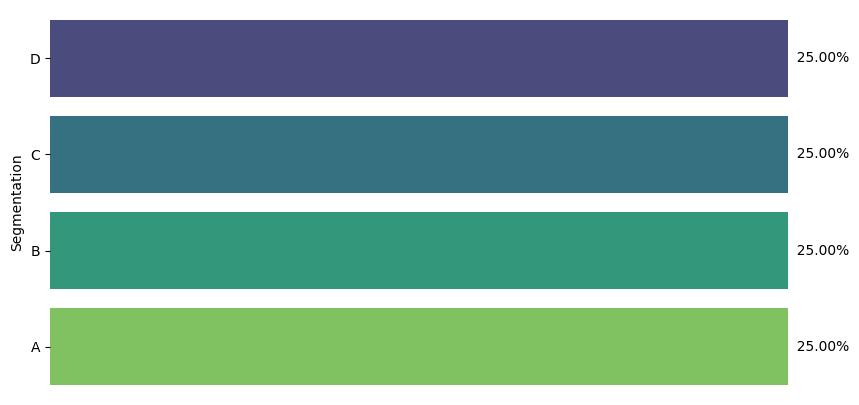

In [ ]:
plt.figure(figsize=(10, 5))

percentage = (cltv['cltv_segment'].value_counts(normalize=True) * 100).reset_index()
percentage.columns = ['segment', 'Percentage']

g = sns.barplot(x='Percentage', y='segment', data=percentage, palette="viridis")
sns.despine(bottom=True, left=True)

for i, v in enumerate(percentage['Percentage']):
    g.text(v, i, "  {:.2f}%".format(v), color='black', ha="left", va='center')

g.set_ylabel('Segmentation')
g.set_xlabel('')
g.set(xticks=[])
plt.show()